In [1]:
import sklearn.datasets as datasets
import numpy as np
import re
import pandas as pd
import seaborn as sns
import os
from numpy import asarray
import matplotlib.pyplot as plt
from PIL import Image
import cv2

## Getting our dataset

In [2]:
# Path where our data is located
base_path = "./asl_dataset/"

# Dictionary to save our 36 classes
categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
                23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
                35: "z",
            }

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(
        lambda x: x[re.search("_", x).start() + 1 : re.search("_", x).start() + 2]
        + "/"
        + x
    )
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [3]:
df.head()

,filename,category
0,r/hand1_r_left_seg_4_cropped.jpeg,27
1,i/hand1_i_top_seg_1_cropped.jpeg,18
2,j/hand4_j_bot_seg_2_cropped.jpeg,19
3,2/hand4_2_bot_seg_2_cropped.jpeg,2
4,1/hand1_1_bot_seg_1_cropped.jpeg,1


In [4]:
pixel_arrays = []
for i,img in enumerate(df["filename"]):
    img = Image.open(base_path+img)  
    numpydata = asarray(img)
    pixel_arrays.append(numpydata)
df["pixel_data"] = pixel_arrays

In [5]:
df.head()

,filename,category,pixel_data
0,r/hand1_r_left_seg_4_cropped.jpeg,27,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,i/hand1_i_top_seg_1_cropped.jpeg,18,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,j/hand4_j_bot_seg_2_cropped.jpeg,19,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,2/hand4_2_bot_seg_2_cropped.jpeg,2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,1/hand1_1_bot_seg_1_cropped.jpeg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [6]:
gray_scale = []
for data in df["pixel_data"]:
    gray_data = data.mean(axis=2)
    gray_scale.append(gray_data.astype(np.uint8))

df["pixel_data"] = gray_scale


In [7]:
df.head()

,filename,category,pixel_data
0,r/hand1_r_left_seg_4_cropped.jpeg,27,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,i/hand1_i_top_seg_1_cropped.jpeg,18,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,j/hand4_j_bot_seg_2_cropped.jpeg,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,2/hand4_2_bot_seg_2_cropped.jpeg,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,1/hand1_1_bot_seg_1_cropped.jpeg,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [8]:
df["pixel_data"][0].shape

(400, 400)

## Extracting the keypoints

In [9]:
sift = cv2.SIFT_create()

keypoints = []
descriptors = []

In [10]:
for img in df["pixel_data"]:
    kp, des = sift.detectAndCompute(img, None)
    
    keypoints.append(kp)
    descriptors.append(des)

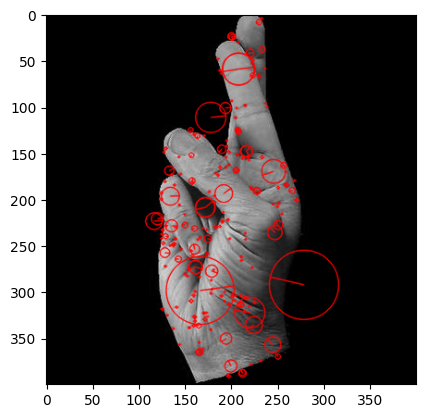

[[ 1.  0.  0. ... 15.  4. 16.]
 [ 1.  0.  0. ... 25.  5.  3.]
 [26.  1.  0. ...  3.  0.  0.]
 ...
 [ 2.  0.  0. ...  0.  0. 44.]
 [31.  1.  0. ...  0.  8. 24.]
 [ 0.  0.  0. ...  1.  0.  0.]]


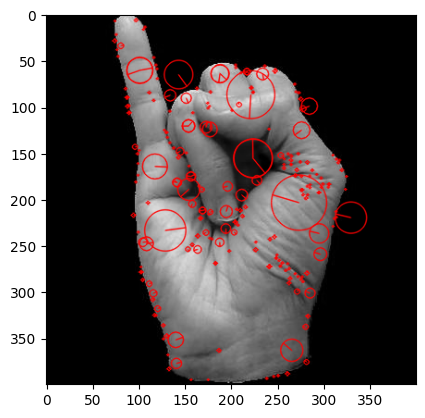

[[ 1.  0.  0. ...  0.  0.  1.]
 [ 3.  4.  0. ...  0.  0.  0.]
 [16.  0.  0. ...  0.  0.  0.]
 ...
 [ 4.  2.  1. ...  0.  0. 24.]
 [ 3.  0.  0. ...  0.  0. 20.]
 [ 0.  0.  0. ... 21. 27. 12.]]


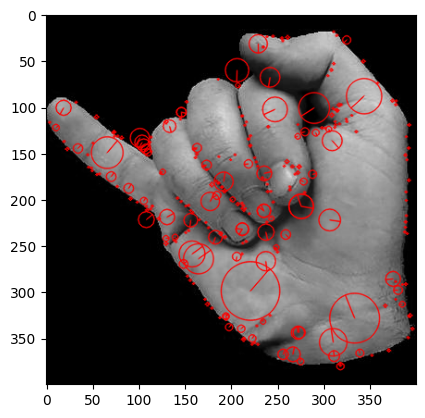

[[ 5.  2.  0. ...  0.  0.  4.]
 [ 0.  0.  0. ...  0.  0. 33.]
 [16.  0.  0. ...  0.  0.  0.]
 ...
 [ 1.  1.  1. ...  1.  1. 16.]
 [ 0.  0.  0. ...  0.  1. 22.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [11]:
output_image = []
for x in range(3):
    output_image.append(cv2.drawKeypoints(df["pixel_data"][x], keypoints[x], 0, (255, 0, 0),
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
    plt.imshow(output_image[x], cmap='gray')
    plt.show()
    print(descriptors[x])

## Creating The Codebook

In [12]:
np.random.seed(0)

sample_idx = np.random.randint(0, len(df)+1, 1000).tolist()

descriptors_sample = []

for n in sample_idx: # We get the descriptors of 1000 random shapes to establish the codebook
    descriptors_sample.append(np.array(descriptors[n]))

In [13]:
all_descriptors = []

for img_descriptors in descriptors_sample:
    for descriptor in img_descriptors:
        all_descriptors.append(descriptor)

# We join all the descriptors 
all_descriptors = np.stack(all_descriptors)

In [14]:
all_descriptors.shape

(206375, 128)

In [15]:
from sklearn.cluster import KMeans

k = 30
iters = 1

kmeans = KMeans(n_clusters=k, n_init=iters, max_iter=300, random_state=0) # K means para identificar dentro de los descriptores los k elementos característicos
kmeans.fit(all_descriptors)
codebook = kmeans.cluster_centers_
variance = kmeans.inertia_

In [16]:
from sklearn.metrics.pairwise import euclidean_distances

def vq(descriptors, codebook): # vector quantization
    distances = euclidean_distances(descriptors, codebook, squared=True)
    closest_visual_words = np.argmin(distances, axis=1)
    return closest_visual_words, distances

visual_words = []
distances = []
for img_descriptors in descriptors:
    img_visual_words, img_distances = vq(img_descriptors, codebook)
    visual_words.append(img_visual_words)
    distances.append(img_distances)

In [17]:
codebook[10].shape  # (all have the same dimensionality)

(128,)

In [18]:
frequency_vectors = []

for img_visual_words in visual_words:
    img_frequency_vector = np.zeros(k)
    for word in img_visual_words:
        img_frequency_vector[word] += 1
    frequency_vectors.append(img_frequency_vector)
# stack together in numpy array
frequency_vectors = np.stack(frequency_vectors)

In [19]:
frequency_vectors.shape

(2515, 30)

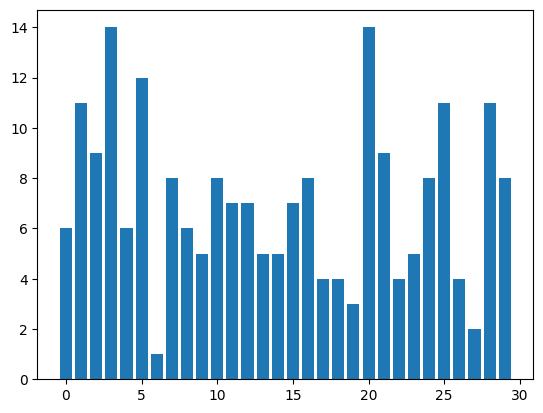

In [20]:
plt.bar(list(range(k)), frequency_vectors[0])
plt.show()

In [21]:
N = 2515

# df is the number of images that a visual word appears in
# we calculate it by counting non-zero values as 1 and summing
d_freq = np.sum(frequency_vectors > 0, axis=0)

In [22]:
idf = np.log(N/ d_freq)
idf.shape, idf[:5]

((30,), array([0.01926997, 0.00598207, 0.13154529, 0.        , 0.01039178]))

In [23]:
tfidf = frequency_vectors * idf
tfidf.shape, tfidf[0][:5]

((2515, 30),
 array([0.1156198 , 0.06580279, 1.18390765, 0.        , 0.06235068]))

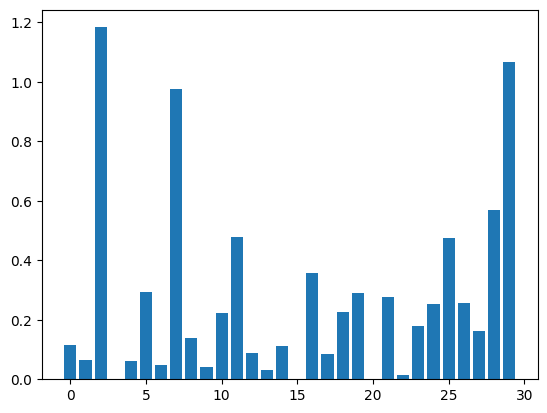

In [24]:
plt.bar(list(range(k)), tfidf[0])
plt.show()

123: 1.0


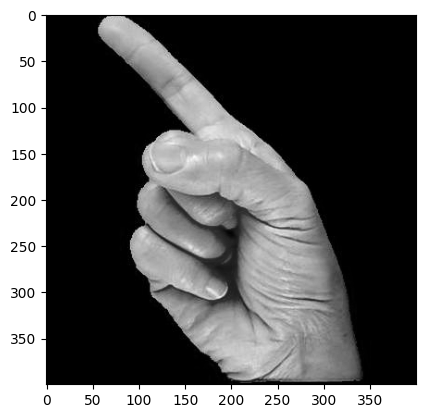

2209: 0.9913


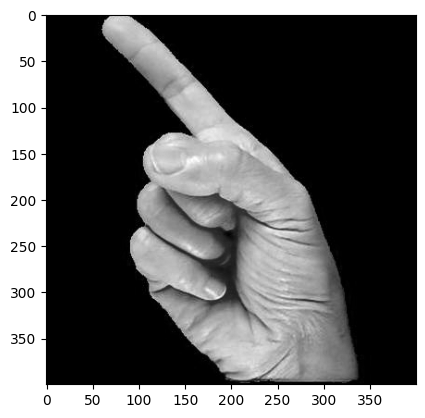

1150: 0.9874


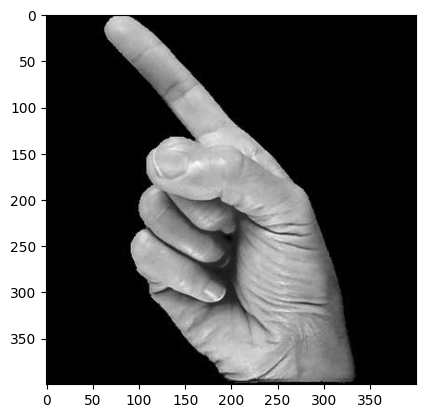

1031: 0.9812


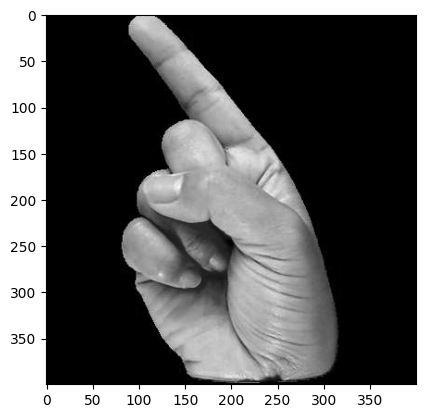

161: 0.9748


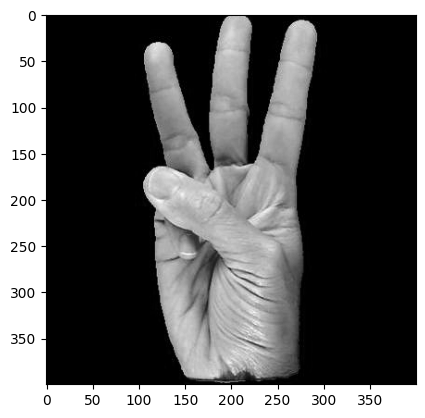

In [25]:
from numpy.linalg import norm

top_k = 5
i = 123

# get search image vector
a = tfidf[i]
b = tfidf  # set search space to the full sample
# get the cosine distance for the search image `a`
cosine_similarity = np.dot(a, b.T)/(norm(a) * norm(b, axis=1))
# get the top k indices for most similar vecs
idx = np.argsort(-cosine_similarity)[:top_k]
# display the results
for i in idx:
    print(f"{i}: {round(cosine_similarity[i], 4)}")
    plt.imshow(df["pixel_data"][i], cmap='gray')
    plt.show()

In [26]:
from collections import Counter

classification = []
for i in idx:
    classification.append(df["category"][i])

def majority_voting(predictions):
    counter = Counter(predictions)
    majority_vote = counter.most_common(1)[0][0]
    return majority_vote

categories[majority_voting(classification)]

'z'

294: 1.0


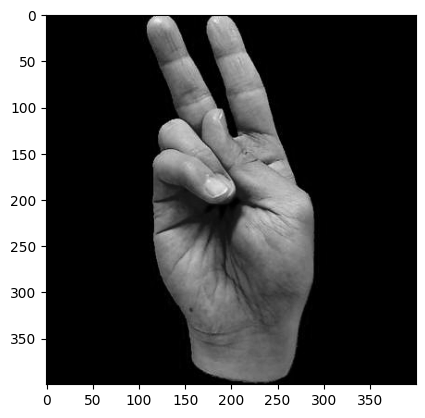

2383: 0.9521


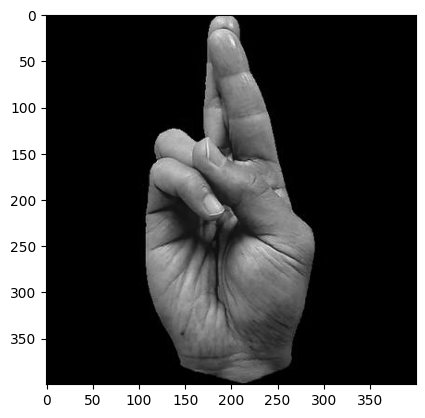

2183: 0.9491


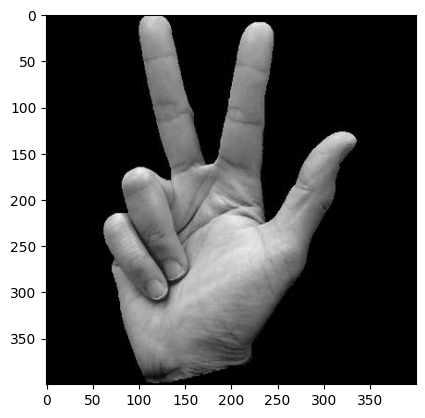

2422: 0.9474


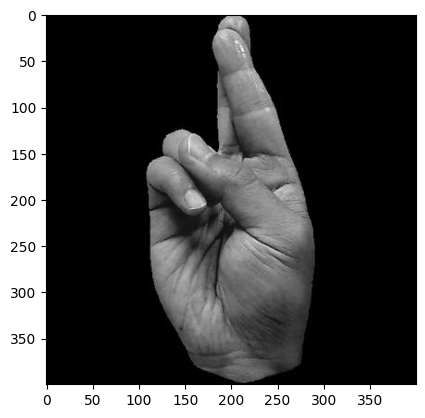

2399: 0.9472


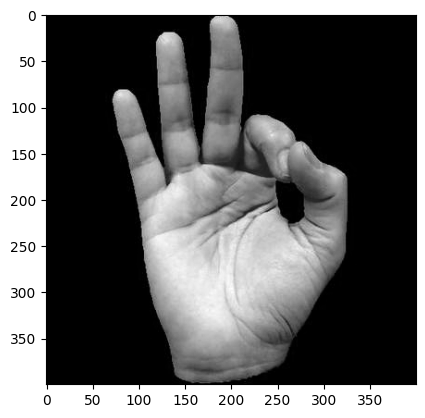

The sign corresponds to, en español, el signo corresponde a: r


In [27]:
# New non-dataset photo
# Needs tfidf 

new_img = "./asl_dataset/k/hand5_k_bot_seg_4_cropped.jpeg"

# Preprocess: Image to grayscale non background of

img = Image.open(new_img)  
numpydata = asarray(img)

gray_data = numpydata.mean(axis=2)
gray_array = gray_data.astype(np.uint8)
# 1. Takes image and extracts keypoints

kp, des = sift.detectAndCompute(gray_array, None)
    

# 2. Takes descriptors and finds the closest visual words in the codebook

img_visual_words, img_distances = vq(des, codebook)


# 3. Finds frequency vector

img_frequency_vector = np.zeros(k)
for word in img_visual_words:
    img_frequency_vector[word] += 1

# Get tfidf

tfidf_particular = img_frequency_vector * idf

a = tfidf_particular
b = tfidf  

cosine_similarity = np.dot(a, b.T)/(norm(a) * norm(b, axis=1))

# Cogemos los mas parecidos (así mejor Carles?)
idx = np.argsort(-cosine_similarity)[:top_k]

for i in idx:
    print(f"{i}: {round(cosine_similarity[i], 4)}")
    plt.imshow(df["pixel_data"][i], cmap='gray')
    plt.show()

classification = []
for i in idx:
    classification.append(df["category"][i])

print("The sign corresponds to, en español, el signo corresponde a:",categories[majority_voting(classification)])